# 4.2 データ整形

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [3]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

# 項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', 
             '両親子供数', '料金', '乗船港コード', '等室名', 
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']
df_titanic.columns = columns_t

#### データ確認

In [4]:
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
print(df_titanic.shape)

(891, 15)


In [6]:
# 項目名を日本語化した元データをcsvファイルにエクスポート
filename = 'titanic_j.csv'

df_titanic.to_csv(filename, index=False)

from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4.2.1 不要な項目の削除

In [ ]:
# 余分な列削除

# 「等室名」 (「等室」と同じ)
df1 = df_titanic.drop('等室名', axis=1)

# 「乗船港」 (「乗船港コード」と同じ)
df2 = df1.drop('乗船港', axis=1)

# 「生存可否」 (「生存」と同じ)
df3 = df2.drop('生存可否', axis=1)

# 結果確認
display(df3.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


### 4.2.2 欠損値の対応

In [ ]:
# 欠損値確認
display(df3.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
男女子供        0
成人男子        0
デッキ       688
独身          0
dtype: int64

In [ ]:
display(df3['デッキ'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: デッキ, dtype: int64

#### 方針の決定

**乗船港コード**: 件数が2件と少ない
-> 行ごと削除する      

**年齢**: 数値データであり、欠損行数が177件とかなり多い
-> 他データの平均値で代用  

**デッキ**: コード値データであり、欠損行数が688行と相当多い
-> 欠損を意味するダミーコードを振って全行処理対象とする

In [ ]:
# 乗船港コード: 件数が2件と少ない 
# -> 行ごと削除する

# dropna関数を利用する
df4 = df3.dropna(subset = ['乗船港コード'])

# 年齢: 数値データであり欠損行数が177件とかなり多い 
# -> 他データの平均値で代用

# 平均値の計算
age_average = df4['年齢'].mean()

# fillna関数の利用
df5 = df4.fillna({'年齢': age_average})

# デッキ: コード値データであり欠損行数が688行と相当多い
# -> 欠損を意味するダミーコードを振って全行処理対象とする

# replace関数の利用  (ダミーコードは 'N' とする)
df6 = df5.replace({'デッキ': {np.nan: 'N'}})

In [ ]:
# 結果確認
display(df6.isnull().sum())

display(df6.head())

生存        0
等室        0
性別        0
年齢        0
兄弟配偶者数    0
両親子供数     0
料金        0
乗船港コード    0
男女子供      0
成人男子      0
デッキ       0
独身        0
dtype: int64

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,N,True


### 4.2.3 2値ラベルの数値化

**性別**: male / female  
**成人男子**: True / False  
**独身**: True / False  
    
をそれぞれ 1/ 0 に数値化する


#### 「性別」の数値化

In [ ]:
display(df6['性別'].value_counts())

male      577
female    312
Name: 性別, dtype: int64

In [ ]:
# 辞書 mf_map の定義
mf_map = {'male': 1, 'female': 0}

# map関数を利用して数値化
df7 = df6.copy()
df7['性別'] = df7['性別'].map(mf_map)

# 結果確認
display(df7.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,N,True


#### 「成人男子」「独身」の数値化

In [ ]:
display(df7['成人男子'].value_counts())

True     537
False    352
Name: 成人男子, dtype: int64

In [ ]:
# 辞書 tf_map の定義
tf_map = {True: 1, False: 0}

# map関数を利用して数値化
df8 = df7.copy()
df8['成人男子'] = df8['成人男子'].map(tf_map)

# map関数を利用して数値化
df9 = df8.copy()
df9['独身'] = df8['独身'].map(tf_map)

# 結果確認
display(df9.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,1,N,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,N,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,N,1


### 4.2.4 多値ラベルの数値化 
One-Hot エンコーディング

In [ ]:
# 変換前
display(df9[['男女子供']].head(10))

,男女子供
0,man
1,woman
2,woman
3,woman
4,man
5,man
6,man
7,child
8,woman
9,child


In [ ]:
# get_dummies関数の利用サンプル

w = pd.get_dummies(df9['男女子供'], prefix='男女子供')
display(w.head(10))

,男女子供_child,男女子供_man,男女子供_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [ ]:
# get_dummies関数でカテゴリ値をone hot vectorに展開する関数を定義
# df 対象データフレーム
# column 対象列

def enc(df, column):
    # One Hot Vector生成
    df_dummy = pd.get_dummies(df[column], prefix=column)
    # 元列の削除
    df_drop = df.drop([column], axis=1)
    # 削除したデータフレームと、One Hot生成列を連結
    df1 = pd.concat([df_drop,df_dummy],axis=1)
    return df1

#### 男女子供
man / woman / child

In [ ]:
# 項目値の確認
display(df9['男女子供'].value_counts())

man      537
woman    269
child     83
Name: 男女子供, dtype: int64

In [ ]:
# One-Hot エンコード化

# 男女子供,
df10 = enc(df9, '男女子供')

# 結果確認
display(df10.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,成人男子,デッキ,独身,男女子供_child,男女子供_man,男女子供_woman
0,0,3,1,22.0000,1,0,7.2500,S,1,N,0,0,1,0
1,1,1,0,38.0000,1,0,71.2833,C,0,C,0,0,0,1
2,1,3,0,26.0000,0,0,7.9250,S,0,N,1,0,0,1
3,1,1,0,35.0000,1,0,53.1000,S,0,C,0,0,0,1
4,0,3,1,35.0000,0,0,8.0500,S,1,N,1,0,1,0


#### 乗船港コードとデッキ

In [ ]:
# One-Hot エンコード化

# 乗船港コード
df11 = enc(df10, '乗船港コード')

# デッキ
df12 = enc(df11, 'デッキ')

# 結果確認
display(df12.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## プレゼン用に追加
決定木で予測モデルを作り、評価する

In [ ]:
# 入力データと正解データに分割
x = df12.drop('生存', axis=1)
y = df12['生存']

In [ ]:
# 訓練データと検証データに分割
random_seed = 123
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.3, random_state=random_seed,
  stratify=y)

In [ ]:
# 学習
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

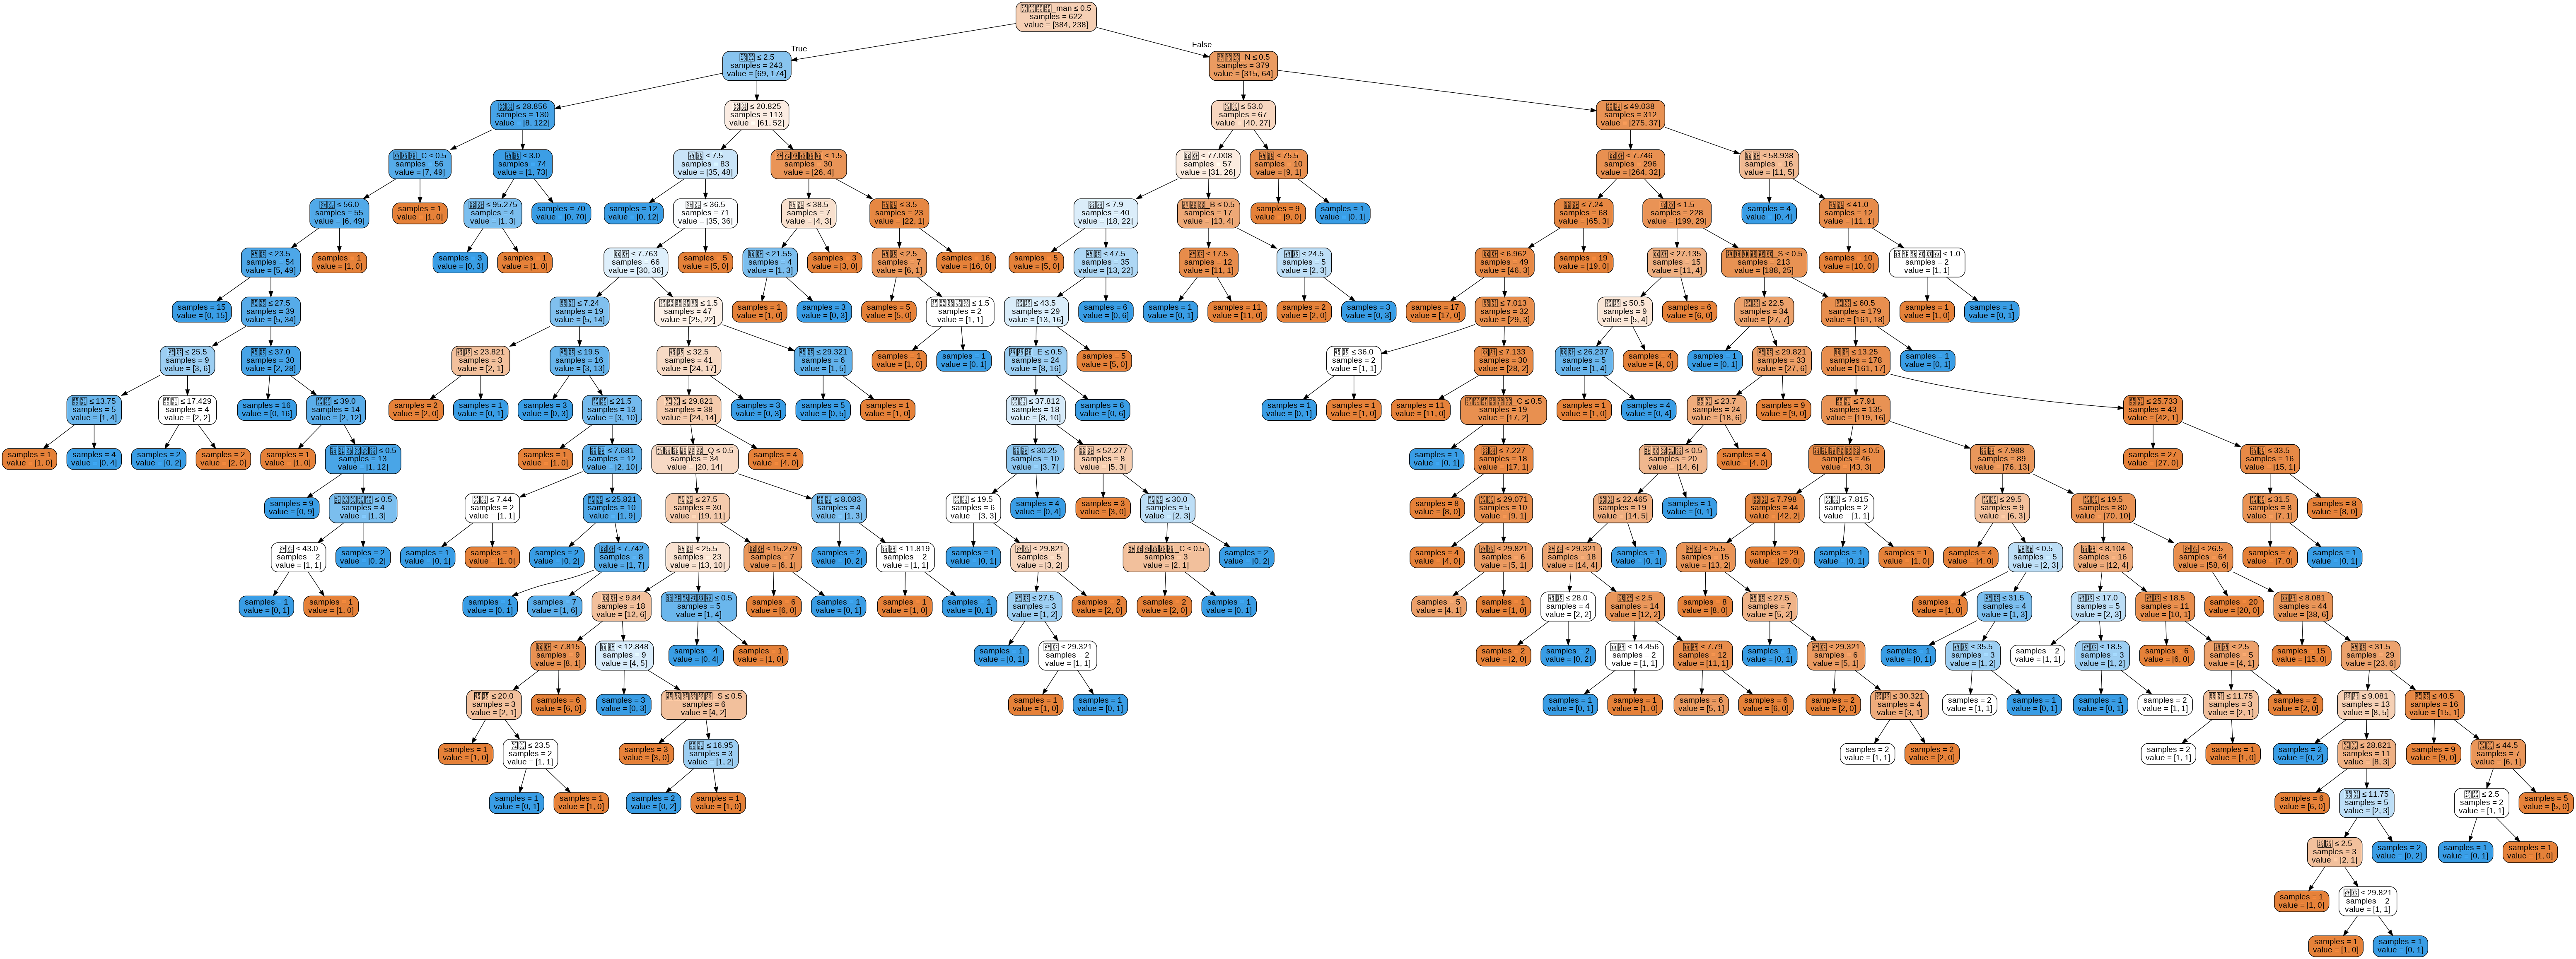

In [40]:
# 決定木のツリー表示
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,  
        special_characters=True, impurity=False, proportion=False
    ) 
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

In [38]:
y_pred = algorithm.predict(x_test)

In [ ]:
# 適合率・再現率・F値の計算

# ライブラリの取込み
from sklearn.metrics import precision_recall_fscore_support

# 適合率・再現率・F値の計算
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary')

# 結果の確認
print(f'適合率: {precision:.4f}')
print(f'再現率: {recall:.4f}')
print(f'F値:   {fscore:.4f}')

適合率: 0.7030
再現率: 0.6961
F値:   0.6995


In [ ]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy配列
    
    # columns 項目名リスト
    n = len(columns)
    
    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

In [ ]:
# 混同行列の計算

# 必要ライブラリの取込み
from sklearn.metrics import confusion_matrix

# 混同行列の生成
#   y_test: 検証データの正解データ
#   y_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# make_cmを使った混同行列標示
cm = make_cm(matrix, ['死亡', '生存'])
display(cm)

予測結果    
           死亡  生存
正解データ 死亡  135  30
      生存   31  71

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>